In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rand

## Hebb-Williams Maze

The Hebb-Willimams (HW) maze is a classical, simply-connected land maze. It consists in a square central arena with a start and goal boxes annexed to opposite corners.
The open central arena may be modified to build several mazes with aditional barries. There are 6 training  and 12 standarized testing configurations.

The empty HW maze can be modeled as a connected network of square spatial segments, nodes, that can be visited from their adjacent neighbors. Each maze configuration is a modification of this empty arena. The barriers are obstacles that eliminates the connection between previously adjacent nodes.

In [2]:
# nodes
# central arena: 6x6 
c_a = nx.grid_2d_graph([1,2,3,4,5,6],['A', 'B', 'C', 'D', 'E', 'F'])
#set their positions
pos = [(ii, jj) for ii in [2,3,4,5,6,7] for jj in [2,3,4,5,6,7]]

In [3]:
pos_id = 0
for ii, data in c_a.nodes(data=True):
    data['pos'] = pos[pos_id]
    pos_id +=1

In [4]:
for pair in c_a.edges():
    p1 = pair[0]
    p2 = pair[1]
    c_a[p1][p2]['weight'] =10

In [5]:
# Add Start (S) and Goal (G) nodes
c_a.add_node((0, 'S'), pos=(1,1))
c_a.add_node((7, 'G'), pos=(8,8))

In [6]:
c_a.add_edge((0,'S'), (1,'A'), weight = 10)
c_a.add_edge((6,'F'), (7, 'G'), weight = 10)

In [7]:
rows = ['A', 'B', 'C', 'D', 'E', 'F']
cols = [1,2,3,4,5,6]

idx_c =0

for jj in range(5):
    idx_r =0
    for ii in range(5):
        c_a.add_edge((cols[idx_c], rows[idx_r]), (cols[idx_c+1], rows[idx_r+1]), weight=14)
        idx_r+=1
    idx_c+=1


In [8]:

cols.reverse()

idx_c =0

for jj in range(5):
    idx_r =0
    for ii in range(5):
        c_a.add_edge((cols[idx_c], rows[idx_r]), (cols[idx_c+1], rows[idx_r+1]), weight=14)
        idx_r+=1
    idx_c+=1


Text(0.5, 1.0, 'Empty Hebb-Willimas Maze')

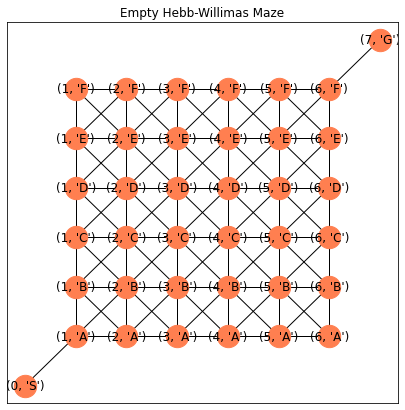

In [9]:
positions = nx.get_node_attributes(c_a, 'pos')
plt.figure(figsize=(7,7))
nx.draw_networkx(c_a, pos= positions, with_labels=True, node_size=500, node_color='coral')
plt.title('Empty Hebb-Willimas Maze')

### Now, in order to build a configuration some edges must be removed.

In [10]:
sec_row = []

for ii in [(2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (2, 'D')]:
    for jj in [(1, 'B'), (1, 'C'), (2, 'B'), (3, 'B'), (4, 'B'), (5, 'B'), (6, 'B')]:
        sec_row.append((ii, jj))

In [11]:
last_row= []

for ii in [(1, 'E'), (2, 'E'), (3, 'E'), (3, 'D')]:
    for jj in [(1, 'F'), (2, 'F'), (3, 'F'), (4, 'F'), (4, 'E'), (4, 'D'), (4, 'C'), (3, 'C')]:
        last_row.append((ii, jj))

In [12]:
extras = [((3, 'F'), (4, 'E')), ((4, 'D'), (3, 'C')), ((1, 'C'), (2, 'B')), ((2, 'D'), (3, 'C'))]

In [13]:
P4 = sec_row + last_row+extras
c_a.remove_edges_from(P4)

Text(0.5, 1.0, 'Hebb-Willimas Maze Problem 4')

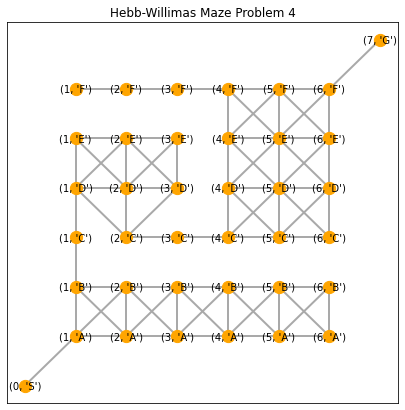

In [14]:
positions = nx.get_node_attributes(c_a, 'pos')
plt.figure(figsize=(7,7))
nx.draw_networkx(c_a, pos= positions, with_labels=True, node_size=150, node_color='orange', edge_color='darkgray', width=2, font_size=10)
plt.title('Hebb-Willimas Maze Problem 4')

In [15]:
HW_EDGES = []

In [16]:
for pair in list(c_a.edges):
    p1 = pair[0]
    p2 = pair[1]
    w_dict = c_a.get_edge_data(p1, p2)
    new_pair= (str(p1[0])+p1[1], str(p2[0])+p2[1], w_dict)
    HW_EDGES.append(new_pair)

In [17]:
HW_EDGES

[('1A', '2A', {'weight': 10}),
 ('1A', '1B', {'weight': 10}),
 ('1A', '0S', {'weight': 10}),
 ('1A', '2B', {'weight': 14}),
 ('1B', '2B', {'weight': 10}),
 ('1B', '1C', {'weight': 10}),
 ('1B', '2A', {'weight': 14}),
 ('1C', '1D', {'weight': 10}),
 ('1D', '2D', {'weight': 10}),
 ('1D', '1E', {'weight': 10}),
 ('1D', '2E', {'weight': 14}),
 ('1D', '2C', {'weight': 14}),
 ('1E', '2E', {'weight': 10}),
 ('1E', '2D', {'weight': 14}),
 ('1F', '2F', {'weight': 10}),
 ('2A', '3A', {'weight': 10}),
 ('2A', '2B', {'weight': 10}),
 ('2A', '3B', {'weight': 14}),
 ('2B', '3B', {'weight': 10}),
 ('2B', '3A', {'weight': 14}),
 ('2C', '3C', {'weight': 10}),
 ('2C', '2D', {'weight': 10}),
 ('2C', '3D', {'weight': 14}),
 ('2D', '3D', {'weight': 10}),
 ('2D', '2E', {'weight': 10}),
 ('2D', '3E', {'weight': 14}),
 ('2E', '3E', {'weight': 10}),
 ('2E', '3D', {'weight': 14}),
 ('2F', '3F', {'weight': 10}),
 ('3A', '4A', {'weight': 10}),
 ('3A', '3B', {'weight': 10}),
 ('3A', '4B', {'weight': 14}),
 ('3B', 

In [18]:
HW_EDGES = [('1A', '2A', {'weight': 10}), ('1A', '1B', {'weight': 10}), ('1A', '0S', {'weight': 10}),
 ('1A', '2B', {'weight': 14}), ('1B', '2B', {'weight': 10}), ('1B', '1C', {'weight': 10}), ('1B', '2C', {'weight': 14}), ('1B', '2A', {'weight': 14}),
 ('1C', '2C', {'weight': 10}), ('1C', '1D', {'weight': 10}), ('1C', '2D', {'weight': 14}), ('1C', '2B', {'weight': 14}), ('1D', '2D', {'weight': 10}),
 ('1D', '1E', {'weight': 10}), ('1D', '2E', {'weight': 14}), ('1D', '2C', {'weight': 14}), ('1E', '2E', {'weight': 10}), ('1E', '1F', {'weight': 10}),
 ('1E', '2F', {'weight': 14}), ('1E', '2D', {'weight': 14}), ('1F', '2F', {'weight': 10}), ('1F', '2E', {'weight': 14}), ('2A', '3A', {'weight': 10}),
 ('2A', '2B', {'weight': 10}), ('2A', '3B', {'weight': 14}), ('2B', '3B', {'weight': 10}), ('2B', '2C', {'weight': 10}), ('2B', '3C', {'weight': 14}),
 ('2B', '3A', {'weight': 14}), ('2C', '3C', {'weight': 10}), ('2C', '2D', {'weight': 10}), ('2C', '3D', {'weight': 14}), ('2C', '3B', {'weight': 14}),
 ('2D', '3D', {'weight': 10}), ('2D', '2E', {'weight': 10}), ('2D', '3E', {'weight': 14}), ('2D', '3C', {'weight': 14}), ('2E', '3E', {'weight': 10}),
 ('2E', '2F', {'weight': 10}), ('2E', '3F', {'weight': 14}), ('2E', '3D', {'weight': 14}), ('2F', '3F', {'weight': 10}), ('2F', '3E', {'weight': 14}),
 ('3A', '4A', {'weight': 10}), ('3A', '3B', {'weight': 10}), ('3A', '4B', {'weight': 14}), ('3B', '4B', {'weight': 10}), ('3B', '3C', {'weight': 10}),
 ('3B', '4C', {'weight': 14}), ('3B', '4A', {'weight': 14}), ('3C', '4C', {'weight': 10}), ('3C', '3D', {'weight': 10}), ('3C', '4D', {'weight': 14}),
 ('3C', '4B', {'weight': 14}), ('3D', '4D', {'weight': 10}), ('3D', '3E', {'weight': 10}), ('3D', '4E', {'weight': 14}), ('3D', '4C', {'weight': 14}),
 ('3E', '4E', {'weight': 10}), ('3E', '3F', {'weight': 10}), ('3E', '4F', {'weight': 14}), ('3E', '4D', {'weight': 14}), ('3F', '4F', {'weight': 10}),
 ('3F', '4E', {'weight': 14}), ('4A', '5A', {'weight': 10}), ('4A', '4B', {'weight': 10}), ('4A', '5B', {'weight': 14}), ('4B', '5B', {'weight': 10}),
 ('4B', '4C', {'weight': 10}), ('4B', '5C', {'weight': 14}), ('4B', '5A', {'weight': 14}), ('4C', '5C', {'weight': 10}), ('4C', '4D', {'weight': 10}),
 ('4C', '5D', {'weight': 14}), ('4C', '5B', {'weight': 14}), ('4D', '5D', {'weight': 10}), ('4D', '4E', {'weight': 10}),
 ('4D', '5E', {'weight': 14}), ('4D', '5C', {'weight': 14}), ('4E', '5E', {'weight': 10}), ('4E', '4F', {'weight': 10}), ('4E', '5F', {'weight': 14}),
 ('4E', '5D', {'weight': 14}), ('4F', '5F', {'weight': 10}), ('4F', '5E', {'weight': 14}), ('5A', '6A', {'weight': 10}), ('5A', '5B', {'weight': 10}),
 ('5A', '6B', {'weight': 14}), ('5B', '6B', {'weight': 10}), ('5B', '5C', {'weight': 10}), ('5B', '6C', {'weight': 14}), ('5B', '6A', {'weight': 14}),
 ('5C', '6C', {'weight': 10}), ('5C', '5D', {'weight': 10}), ('5C', '6D', {'weight': 14}), ('5C', '6B', {'weight': 14}), ('5D', '6D', {'weight': 10}),
 ('5D', '5E', {'weight': 10}), ('5D', '6E', {'weight': 14}), ('5D', '6C', {'weight': 14}), ('5E', '6E', {'weight': 10}), ('5E', '5F', {'weight': 10}),
 ('5E', '6F', {'weight': 14}), ('5E', '6D', {'weight': 14}), ('5F', '6F', {'weight': 10}), ('5F', '6E', {'weight': 14}), ('6A', '6B', {'weight': 10}),
 ('6B', '6C', {'weight': 10}), ('6C', '6D', {'weight': 10}), ('6D', '6E', {'weight': 10}), ('6E', '6F', {'weight': 10}), ('6F', '7G', {'weight': 10})]


In [19]:
HW_POSITIONS = {'1A': (2, 2), '1B': (2, 3), '1C': (2, 4), '1D': (2, 5), '1E': (2, 6), '1F': (2, 7), '2A': (3, 2),
 '2B': (3, 3), '2C': (3, 4), '2D': (3, 5), '2E': (3, 6), '2F': (3, 7), '3A': (4, 2), '3B': (4, 3), '3C': (4, 4),
 '3D': (4, 5), '3E': (4, 6), '3F': (4, 7), '4A': (5, 2), '4B': (5, 3), '4C': (5, 4), '4D': (5, 5), '4E': (5, 6),
 '4F': (5, 7), '5A': (6, 2), '5B': (6, 3), '5C': (6, 4), '5D': (6, 5), '5E': (6, 6), '5F': (6, 7), '6A': (7, 2),
 '6B': (7, 3), '6C': (7, 4), '6D': (7, 5), '6E': (7, 6), '6F': (7, 7), '0S': (1, 1), '7G': (8, 8)}

In [20]:
P4_EDGES = [('2C', '1B'), ('2C', '1C'), ('2C', '2B'), ('2C', '3B'), ('3C', '2B'), ('3C', '3B'), ('3C', '4B'),
 ('4C', '3B'), ('4C', '4B'), ('4C', '5B'), ('5C', '4B'), ('5C', '5B'), ('5C', '6B'), ('6C', '5B'), ('6C', '6B'),
 ('2D', '1C'), ('1E', '1F'), ('1E', '2F'), ('2E', '1F'), ('2E', '2F'), ('2E', '3F'), ('3E', '2F'), ('3E', '3F'),
 ('3E', '4F'), ('3E', '4E'), ('3E', '4D'), ('3D', '4E'), ('3D', '4D'), ('3D', '4C'), ('3D', '3C'), ('3F', '4E'),
 ('4D', '3C'), ('1C', '2B'), ('2D', '3C')]

In [21]:
class MyGraph(nx.Graph):
    def __init__(self):
        nx.Graph.__init__(self)
        self.add_edges_from(HW_EDGES)
        nx.set_node_attributes(self, HW_POSITIONS, 'pos')
    
    def P4(self):
        self.remove_edges_from(P4_EDGES)
        return(self)

In [229]:
test_my = MyGraph().P4()

In [23]:
test_my

In [24]:
pos = nx.get_node_attributes(test_my, 'pos')

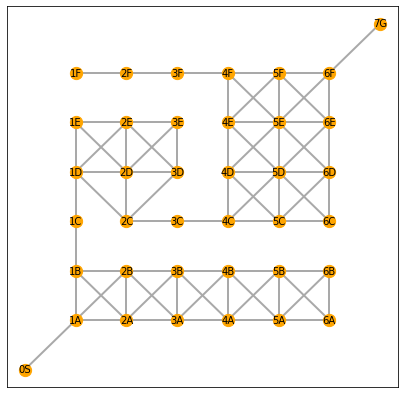

In [25]:
plt.figure(figsize=(7,7))
nx.draw_networkx(test_my, pos=pos, with_labels=True, node_size=150, node_color='orange', edge_color='darkgray', width=2, font_size=10)


In [153]:
nx.set_node_attributes(test_my, 'lightgray', name = 'color')
colors = nx.get_node_attributes(test_my, 'color')

In [244]:
{k:test_my.nodes[k] for k in list(test_my.nodes)}

{'1A': {'pos': (2, 2), 'Status': 'E', 'color': 'gold'},
 '2A': {'pos': (3, 2), 'Status': 'E', 'color': 'orangered'},
 '1B': {'pos': (2, 3), 'Status': 'E', 'color': 'gold'},
 '0S': {'pos': (1, 1), 'Status': 'E', 'color': 'gold'},
 '2B': {'pos': (3, 3), 'Status': 'E', 'color': 'orangered'},
 '1C': {'pos': (2, 4), 'Status': 'E', 'color': 'gold'},
 '2C': {'pos': (3, 4), 'Status': 'E', 'color': 'gold'},
 '1D': {'pos': (2, 5), 'Status': 'E', 'color': 'gold'},
 '2D': {'pos': (3, 5), 'Status': 'E', 'color': 'gold'},
 '1E': {'pos': (2, 6), 'Status': 'E', 'color': 'gold'},
 '2E': {'pos': (3, 6), 'Status': 'E', 'color': 'gold'},
 '1F': {'pos': (2, 7), 'Status': None, 'color': 'lightgray'},
 '2F': {'pos': (3, 7), 'Status': None, 'color': 'lightgray'},
 '3A': {'pos': (4, 2), 'Status': 'E', 'color': 'orangered'},
 '3B': {'pos': (4, 3), 'Status': 'E', 'color': 'orangered'},
 '3C': {'pos': (4, 4), 'Status': 'E', 'color': 'gold'},
 '3D': {'pos': (4, 5), 'Status': 'E', 'color': 'gold'},
 '3E': {'pos': (

In [238]:
test_my.edges['0S', '1A']


{'weight': 10, 'Status': 'R', 'color': 'steelblue'}

In [216]:
any(mark != None for mark in [v['Status'] for v in dict(test_my['1A']).values()])

True

In [249]:
def Tremaux_Search(Graph: nx.Graph, start: str, goal: str):
    '''Tremaux alogorithm to solve Hebb-Williams maze. Takes a graph, start node and goal node.
    This algorithm is intended to work with an undirected graph. In order to visualize a classical maze view, node positions must be defined in the input graph.'''
     # reset the maze
    nx.set_edge_attributes(Graph, None, name = 'Status')
    nx.set_node_attributes(Graph, None, name = 'Status')
    nx.set_node_attributes(Graph, 'lightgray', name = 'color')
    nx.set_edge_attributes(Graph, 'gray', name = 'color')
    pos = nx.get_node_attributes(Graph, 'pos')
    p_node = start  # set start node
    print(f'Current node {p_node}')
    
    path = []
    while p_node != goal:
    # visualize search
        Graph.nodes[p_node]['color'] = 'orangered'
        colors = nx.get_node_attributes(Graph, 'color')
        e_colors = nx.get_edge_attributes(Graph, 'color')
        plt.clf()
        nx.draw_networkx(Graph, pos=pos, with_labels=True, node_size=200, node_color=colors.values(), edge_color=e_colors.values(), width=2, font_size=10)
        plt.show()
        # start the search
        Graph.nodes[p_node]['Status'] = 'E'
        # is there any unmarked door?
        if any(mark == None for mark in [v['Status'] for v in dict(Graph[p_node]).values()]):
            unmarked_doors = [k for k, v in dict(Graph[p_node]).items() if v['Status'] == None]
            next_move =  rand.choice(unmarked_doors) # choose any unmarked door
            Graph.edges[p_node, next_move]['Status'] = 'C' # mark it 'C' for Crossed
            Graph.edges[p_node, next_move]['color'] = 'steelblue'
            path.append((p_node, next_move, Graph.edges[p_node, next_move]))
            Graph.nodes[p_node]['color'] = 'gold'
            p_node = next_move # go to selected node
            print(f'Moved to node {p_node}')
        # is there any door marked 'R'
        elif any(mark == 'C' for mark in [v['Status'] for v in dict(Graph[p_node]).values()]):
            R_doors = [k for k, v in dict(Graph[p_node]).items() if v['Status'] == 'C']
            for door in R_doors:
                next_move =  rand.choice(R_doors) # choose any 'C' door
                Graph.edges[p_node, next_move]['Status'] = 'DC' # mark it DoubleCrossed
                Graph.edges[p_node, next_move]['color'] = 'red' # mark it red
                path.append((p_node, next_move, Graph.edges[p_node, next_move]))
                p_node = next_move # go to selected node
                print(f'No unvisited neighbor found. \nBacktracked to {p_node}')
                
                break
        else:
            print('Something went wrong!!')
            return
    print(f'Search end. Current node:{p_node}')
    Graph.nodes[p_node]['color'] = 'orangered'
    #build directed graph from search
    path_g = nx.DiGraph(path)
    nodes_attr = {k:Graph.nodes[k] for k in list(path_g.nodes)}
    nx.set_node_attributes(path_g, nodes_attr)
    p_colors = nx.get_node_attributes(path_g, 'color')
    pe_colors = nx.get_edge_attributes(path_g, 'color')
    p_pos = nx.get_node_attributes(path_g, 'pos')
    plt.clf()
    nx.draw_networkx(path_g, pos=p_pos, with_labels=True, node_size=200, node_color=p_colors.values(), edge_color=pe_colors.values(), width=2, font_size=10)
    plt.show()
    
    return path

Current node 0S


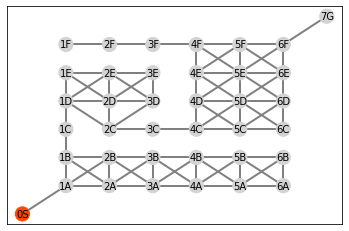

Moved to node 1A


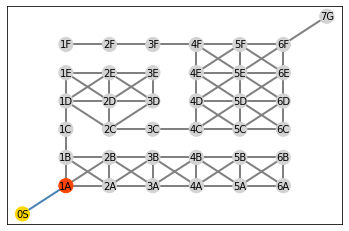

Moved to node 2A


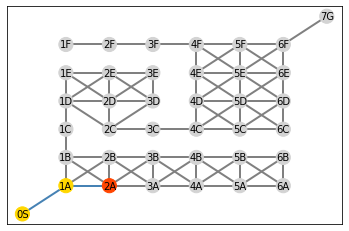

Moved to node 1B


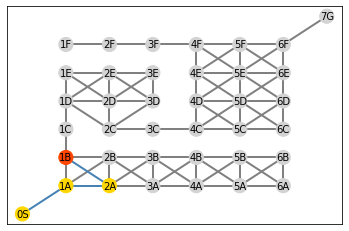

Moved to node 1A


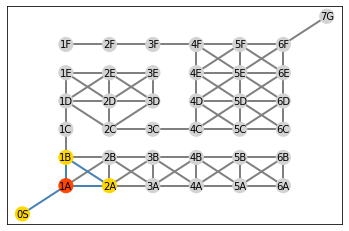

Moved to node 2B


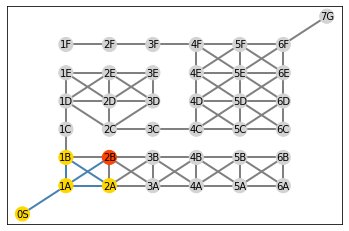

Moved to node 1B


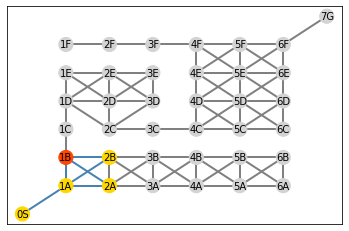

Moved to node 1C


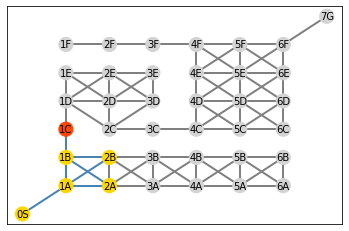

Moved to node 1D


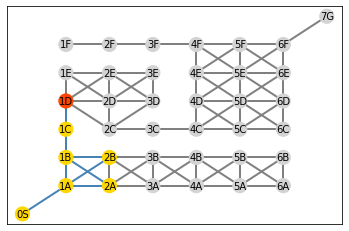

Moved to node 2C


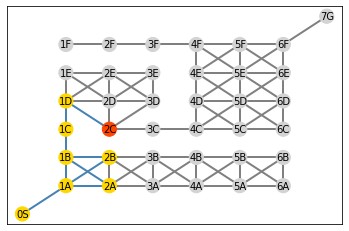

Moved to node 3D


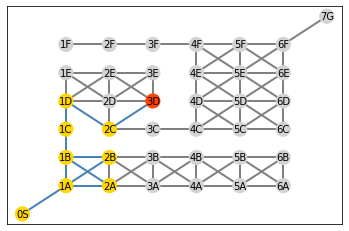

Moved to node 3E


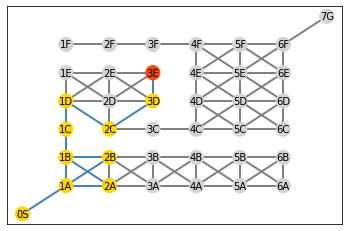

Moved to node 2E


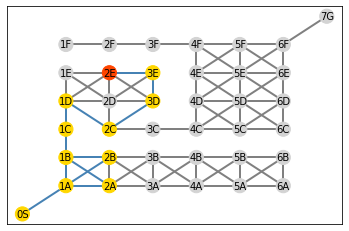

Moved to node 3D


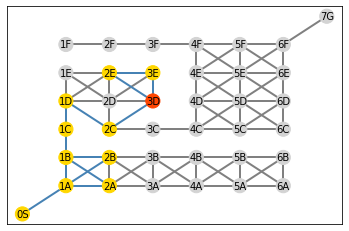

Moved to node 2D


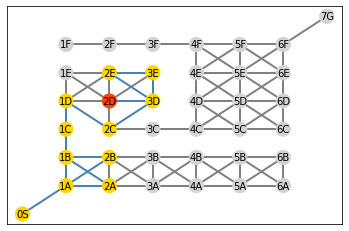

Moved to node 2C


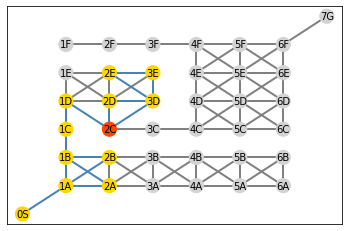

Moved to node 3C


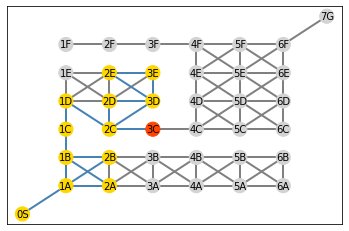

Moved to node 4C


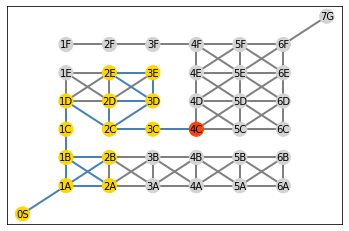

Moved to node 4D


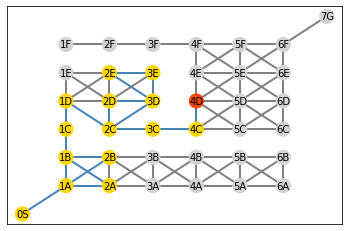

Moved to node 4E


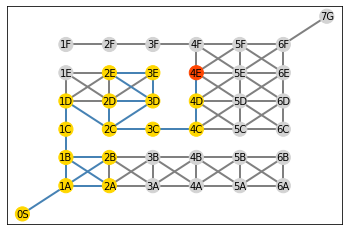

Moved to node 5E


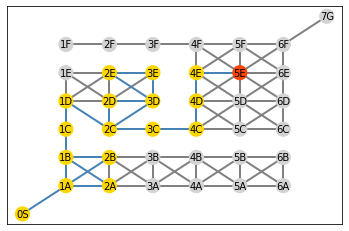

Moved to node 6F


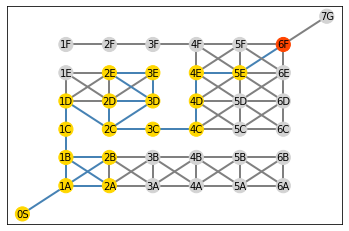

Moved to node 7G
Search end. Current node:7G


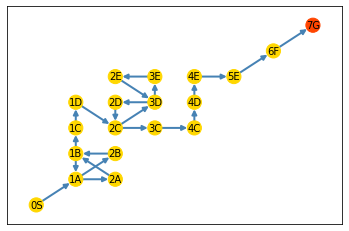

In [254]:
path = Tremaux_Search(test_my, '0S', '7G')

In [253]:
[item for item in path if '5F' in item]

[('6E', '5F', {'weight': 14, 'Status': 'DC', 'color': 'red'}),
 ('5F', '4E', {'weight': 14, 'Status': 'C', 'color': 'steelblue'}),
 ('6E', '5F', {'weight': 14, 'Status': 'DC', 'color': 'red'}),
 ('5F', '6F', {'weight': 10, 'Status': 'C', 'color': 'steelblue'})]

In [25]:
a_traversal = nx.traversal.dfs_tree(test_my, '0S')

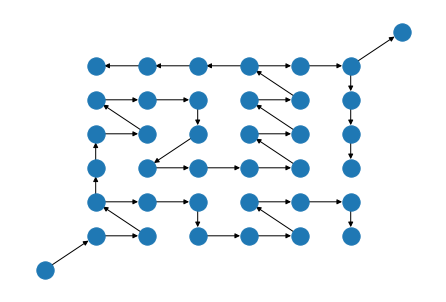

In [26]:
nx.draw(a_traversal, pos=pos)